In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your JSON file
file_path = 'final_results-mac.json'

# Load the JSON file into a pandas DataFrame
df = pd.read_json(file_path, orient='index')

# Now df is a DataFrame containing your data
print(df.head())  # To view the first few rows of the DataFrame

# Calculate the generalization gap and the new variable
df['generalization_gap'] = abs(df['train_acc'] - df['test_acc'])
df['n_param'] = df['n_param'].astype(float)  # Ensure n_param is float
df['n_param_distance'] = df['n_param'] * df['distance_to_initialization']


                               train_acc  test_acc  \
MNIST-16-5-16.16.321_modified   0.894407    0.8756   
MNIST-16-7-16.16.321_renamed    0.906017    0.8845   
MNIST-32-5-16.16.321_           0.894407    0.8756   
MNIST-32-7-16.16.321_           0.906017    0.8845   
MNIST-64-5-16.16.321_           0.894407    0.8756   

                               distance_to_initialization  n_param  \
MNIST-16-5-16.16.321_modified                   16.540003  4137084   
MNIST-16-7-16.16.321_renamed                    17.579144  4137084   
MNIST-32-5-16.16.321_                           16.540003  4137084   
MNIST-32-7-16.16.321_                           17.579144  4137084   
MNIST-64-5-16.16.321_                           16.540003  4137084   

                                        cfg  batchsize  epochs   dataset_name  
MNIST-16-5-16.16.321_modified  [16, 16, 32]         16       5  FASHION-MNIST  
MNIST-16-7-16.16.321_renamed   [16, 16, 32]         16       7  FASHION-MNIST  
MNIST-32-5-16.

/var/folders/rz/vct6h2j92ts4qz5005twnrsr0000gn/T/ipykernel_65204/435913705.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(grouped['n_param'], grouped['mean_generalization_gap'], yerr=grouped['std_generalization_gap'], fmt='-o', capsize=5, ecolor='green', linestyle='-', marker='^', markersize=8, label='Generalization Gap')
/var/folders/rz/vct6h2j92ts4qz5005twnrsr0000gn/T/ipykernel_65204/435913705.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(grouped['n_param'], grouped['mean_generalization_gap'], yerr=grouped['std_generalization_gap'], fmt='-o', capsize=5, ecolor='green', linestyle='-', marker='^', markersize=8, label='Generalization Gap')


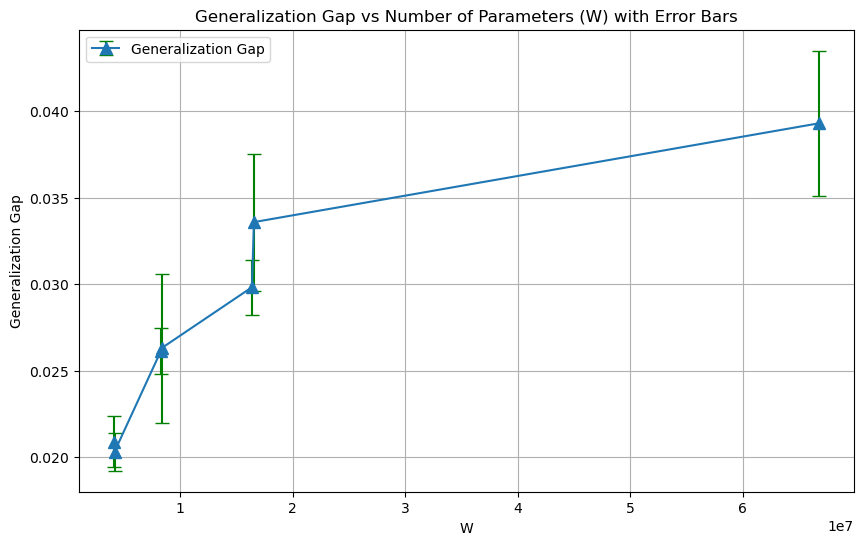

In [22]:
# Group by 'n_param' and calculate the mean and standard deviation of the generalization gap
grouped = df.groupby('n_param')['generalization_gap'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
grouped.columns = ['n_param', 'mean_generalization_gap', 'std_generalization_gap']

# Plotting with error bars using standard deviation as the error
plt.figure(figsize=(10, 6))
plt.errorbar(grouped['n_param'], grouped['mean_generalization_gap'], yerr=grouped['std_generalization_gap'], fmt='-o', capsize=5, ecolor='green', linestyle='-', marker='^', markersize=8, label='Generalization Gap')

# Customizing the plot
plt.xlabel('W')
plt.ylabel('Generalization Gap')
plt.title('Generalization Gap vs Number of Parameters (W) with Error Bars')
plt.legend()
plt.grid(True)  # Adding a grid for better readability

# Show the plot
plt.show()

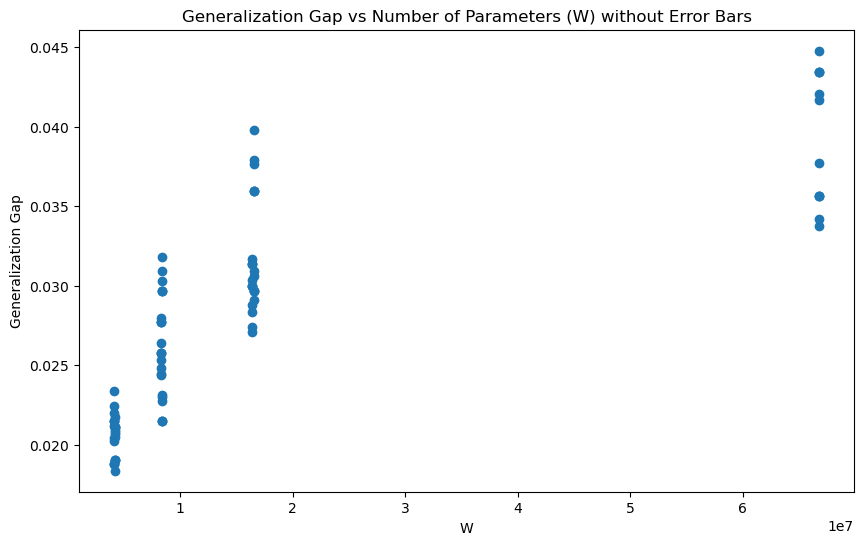

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['n_param'], df['generalization_gap'])
plt.xlabel('W')
plt.ylabel('Generalization Gap')
plt.title('Generalization Gap vs Number of Parameters (W) without Error Bars')
plt.show()


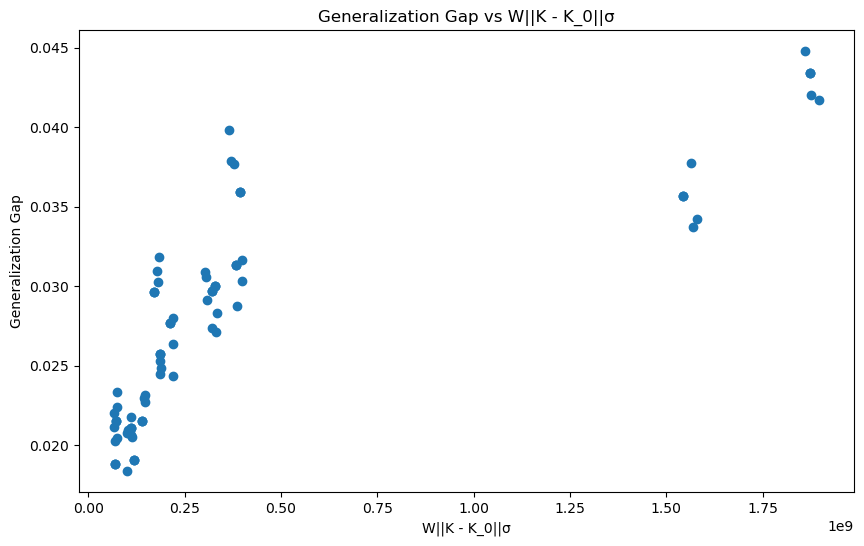

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['n_param_distance'], df['generalization_gap'])
plt.xlabel('W||K - K_0||σ')
plt.ylabel('Generalization Gap')
plt.title('Generalization Gap vs W||K - K_0||σ')
plt.show()

/var/folders/rz/vct6h2j92ts4qz5005twnrsr0000gn/T/ipykernel_65204/1405633854.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(grouped['n_param'], grouped['mean distance'], yerr=grouped['std_distance'], fmt='-o', capsize=5, ecolor='red', linestyle='-', marker='^', markersize=8, label='Mean Distance to Initialization')
/var/folders/rz/vct6h2j92ts4qz5005twnrsr0000gn/T/ipykernel_65204/1405633854.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(grouped['n_param'], grouped['mean distance'], yerr=grouped['std_distance'], fmt='-o', capsize=5, ecolor='red', linestyle='-', marker='^', markersize=8, label='Mean Distance to Initialization')


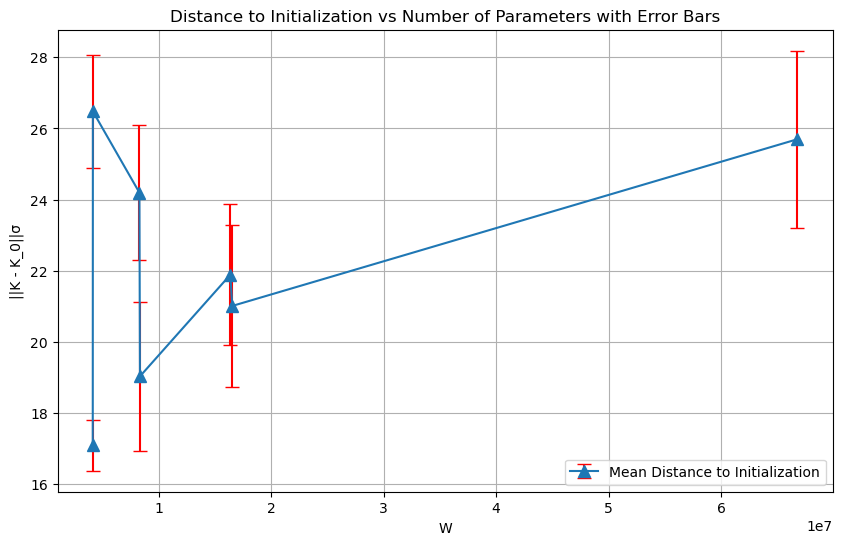

In [25]:
# Group by 'n_param' and calculate the median and interquartile range (IQR) for distance_to_initialization
grouped = df.groupby('n_param')['distance_to_initialization'].agg(['mean','median', 'std']).reset_index()

# Rename columns for clarity
grouped.columns = ['n_param', 'mean distance','median_distance', 'std_distance']

# Plotting with error bars using IQR as the error
plt.figure(figsize=(10, 6))
plt.errorbar(grouped['n_param'], grouped['mean distance'], yerr=grouped['std_distance'], fmt='-o', capsize=5, ecolor='red', linestyle='-', marker='^', markersize=8, label='Mean Distance to Initialization')

# Customizing the plot
plt.xlabel('W')
plt.ylabel('||K - K_0||σ')
plt.title('Distance to Initialization vs Number of Parameters with Error Bars')
plt.legend()
plt.grid(True)  # Adding a grid for better readability

# Show the plot
plt.show()

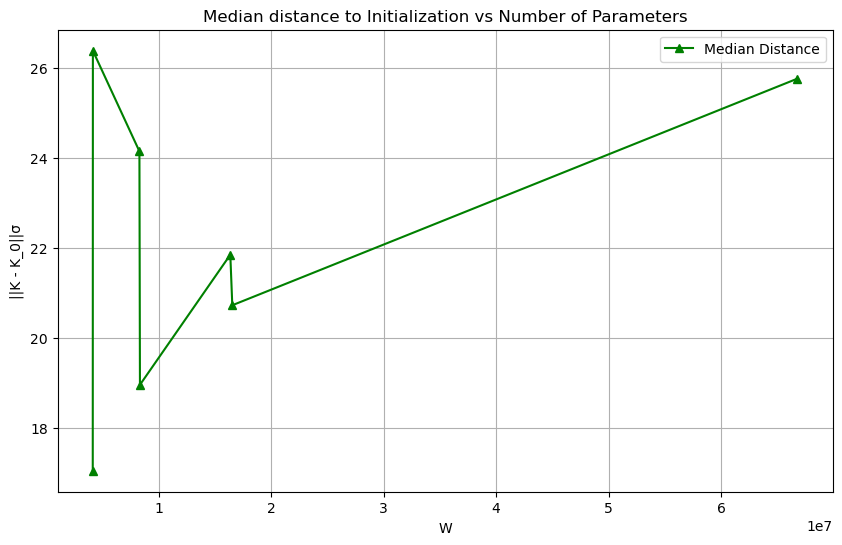

In [26]:
# Plotting the median as a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped['n_param'], grouped['median_distance'], marker='^', linestyle='-', color='green', label='Median Distance')

# Customizing the plot
plt.xlabel('W')
plt.ylabel('||K - K_0||σ')
plt.title('Median distance to Initialization vs Number of Parameters')
plt.legend()
plt.grid(True)